##Initial Analysis


#Univariate analysis

#Initial Setup

In [1]:
#Load the data and perform basic checks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('cleaned_data.csv')


##Convert Data Types

In [2]:
#Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

##Check for Missing Values

In [3]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Display summary statistics
print("Summary statistics:\n", data.describe(include='all'))


Missing values:
 user_id               0
date                  0
steps                 0
calories_burned       0
distance_km           0
active_minutes        0
sleep_hours           0
heart_rate_avg        0
workout_type          0
weather_conditions    0
location              0
mood                  0
dtype: int64
Summary statistics:
             user_id                        date         steps  \
count   5000.000000                        5000   5000.000000   
unique          NaN                         NaN           NaN   
top             NaN                         NaN           NaN   
freq            NaN                         NaN           NaN   
mean      50.041600  2023-06-29 13:51:10.080000   7063.753200   
min        1.000000         2023-01-01 00:00:00    500.000000   
25%       25.000000         2023-03-31 00:00:00   2000.000000   
50%       50.000000         2023-06-27 00:00:00   4664.000000   
75%       74.000000         2023-09-30 00:00:00  11284.000000   
max      10

##Univariate Analysis of Numerical Columns


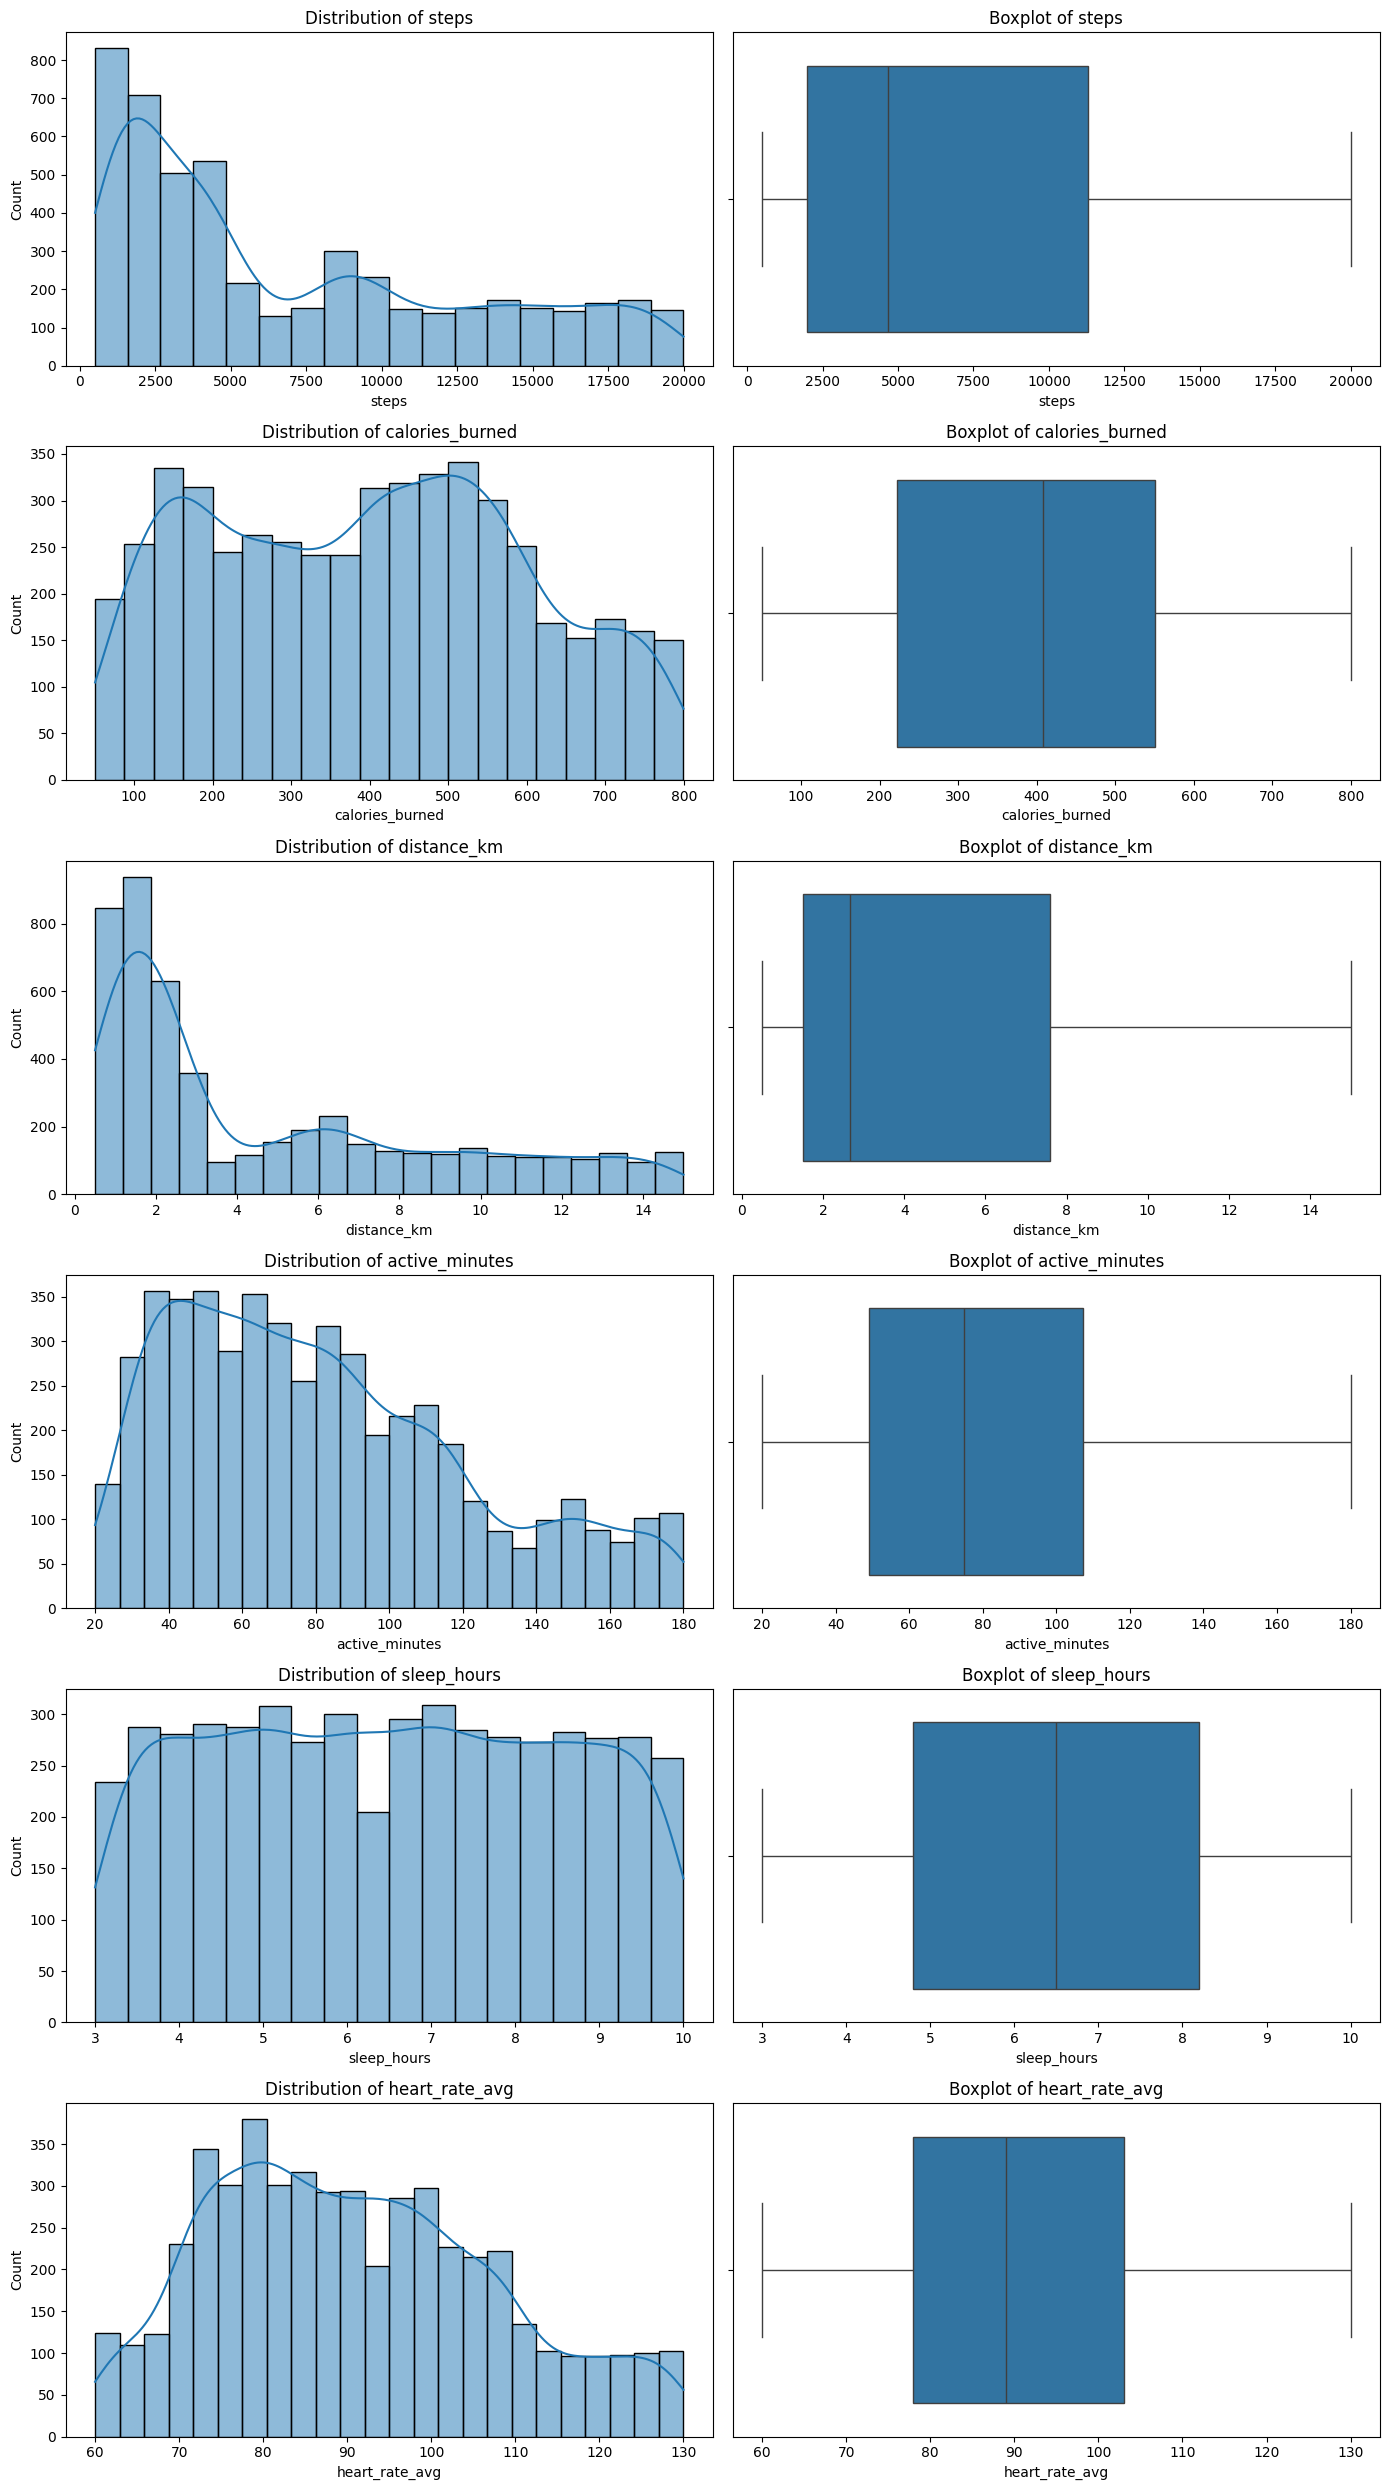

In [4]:
#Plot histograms and boxplots to visualize distributions and detect outliers

# Define numerical columns
numerical_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']

# Set up the plotting grid
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 25))
for i, col in enumerate(numerical_cols):
    # Distribution plot
    sns.histplot(data[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')

    # Boxplot for outliers
    sns.boxplot(x=data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


##Univariate Analysis of Categorical Columns

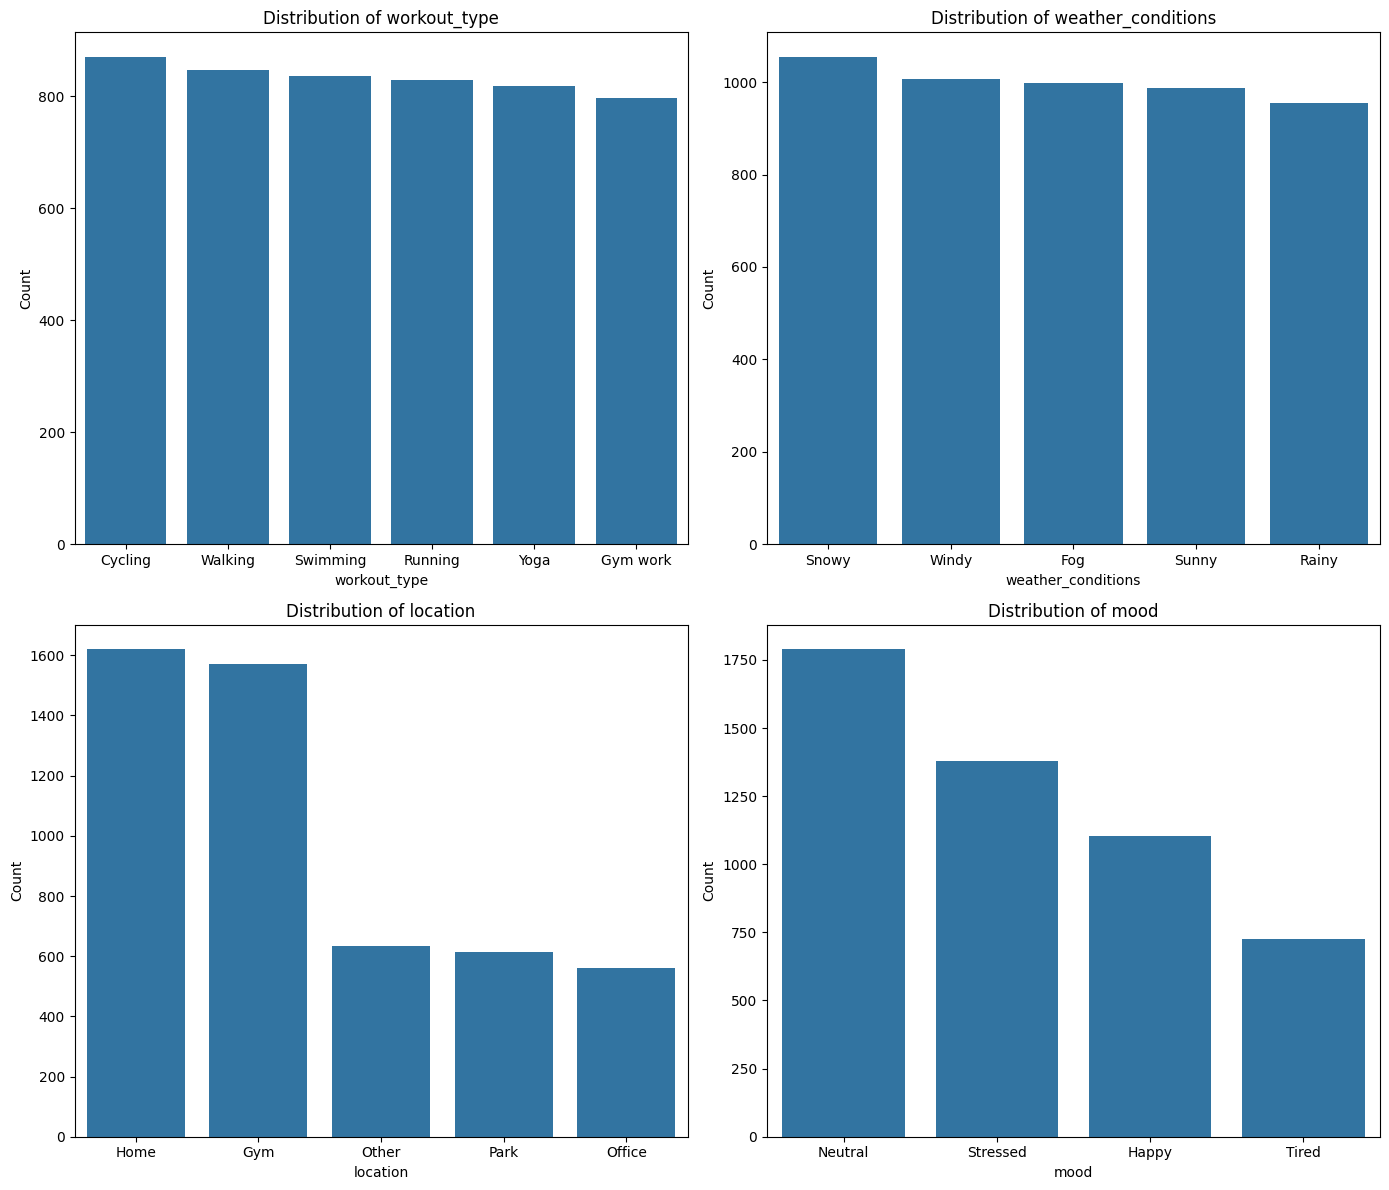

In [5]:
#Analyze distributions of categorical variables and visualize the counts

# Define categorical columns
categorical_cols = ['workout_type', 'weather_conditions', 'location', 'mood']

# Plot bar charts for categorical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], order=data[col].value_counts().index, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {col}')
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


##Identifying Low Variance Columns

In [7]:
#Remove or flag columns with low variance

# Calculate variance for numerical columns
low_variance_cols = [col for col in numerical_cols if data[col].var() < 0.1]
print("Low variance columns:", low_variance_cols)


Low variance columns: []


##Check Imbalance in Target Variable

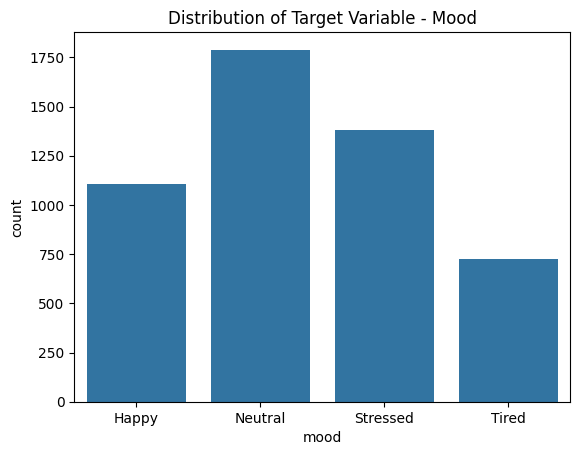

In [8]:
#Visualize the balance of classes in the mood column if it’s the target

# Plot mood distribution
sns.countplot(x=data['mood'])
plt.title("Distribution of Target Variable - Mood")
plt.show()


##Date-Based Analysis

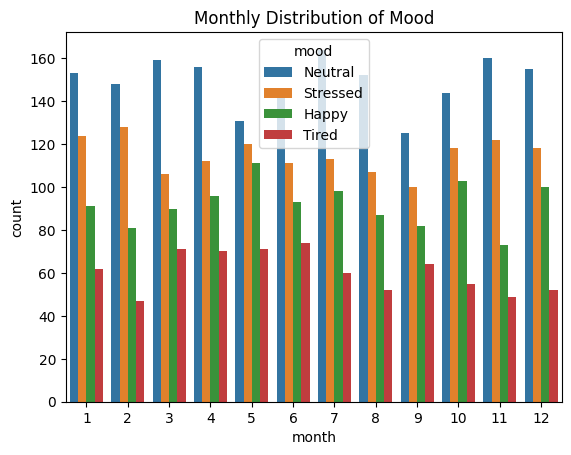

In [9]:
# Extract year, month, and day if relevant for analysis
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Plot time-based trends, e.g., monthly mood distribution
sns.countplot(x=data['month'], hue=data['mood'])
plt.title("Monthly Distribution of Mood")
plt.show()


##Bivariate analysis

#Pairwise Relationships using Scatter Plots

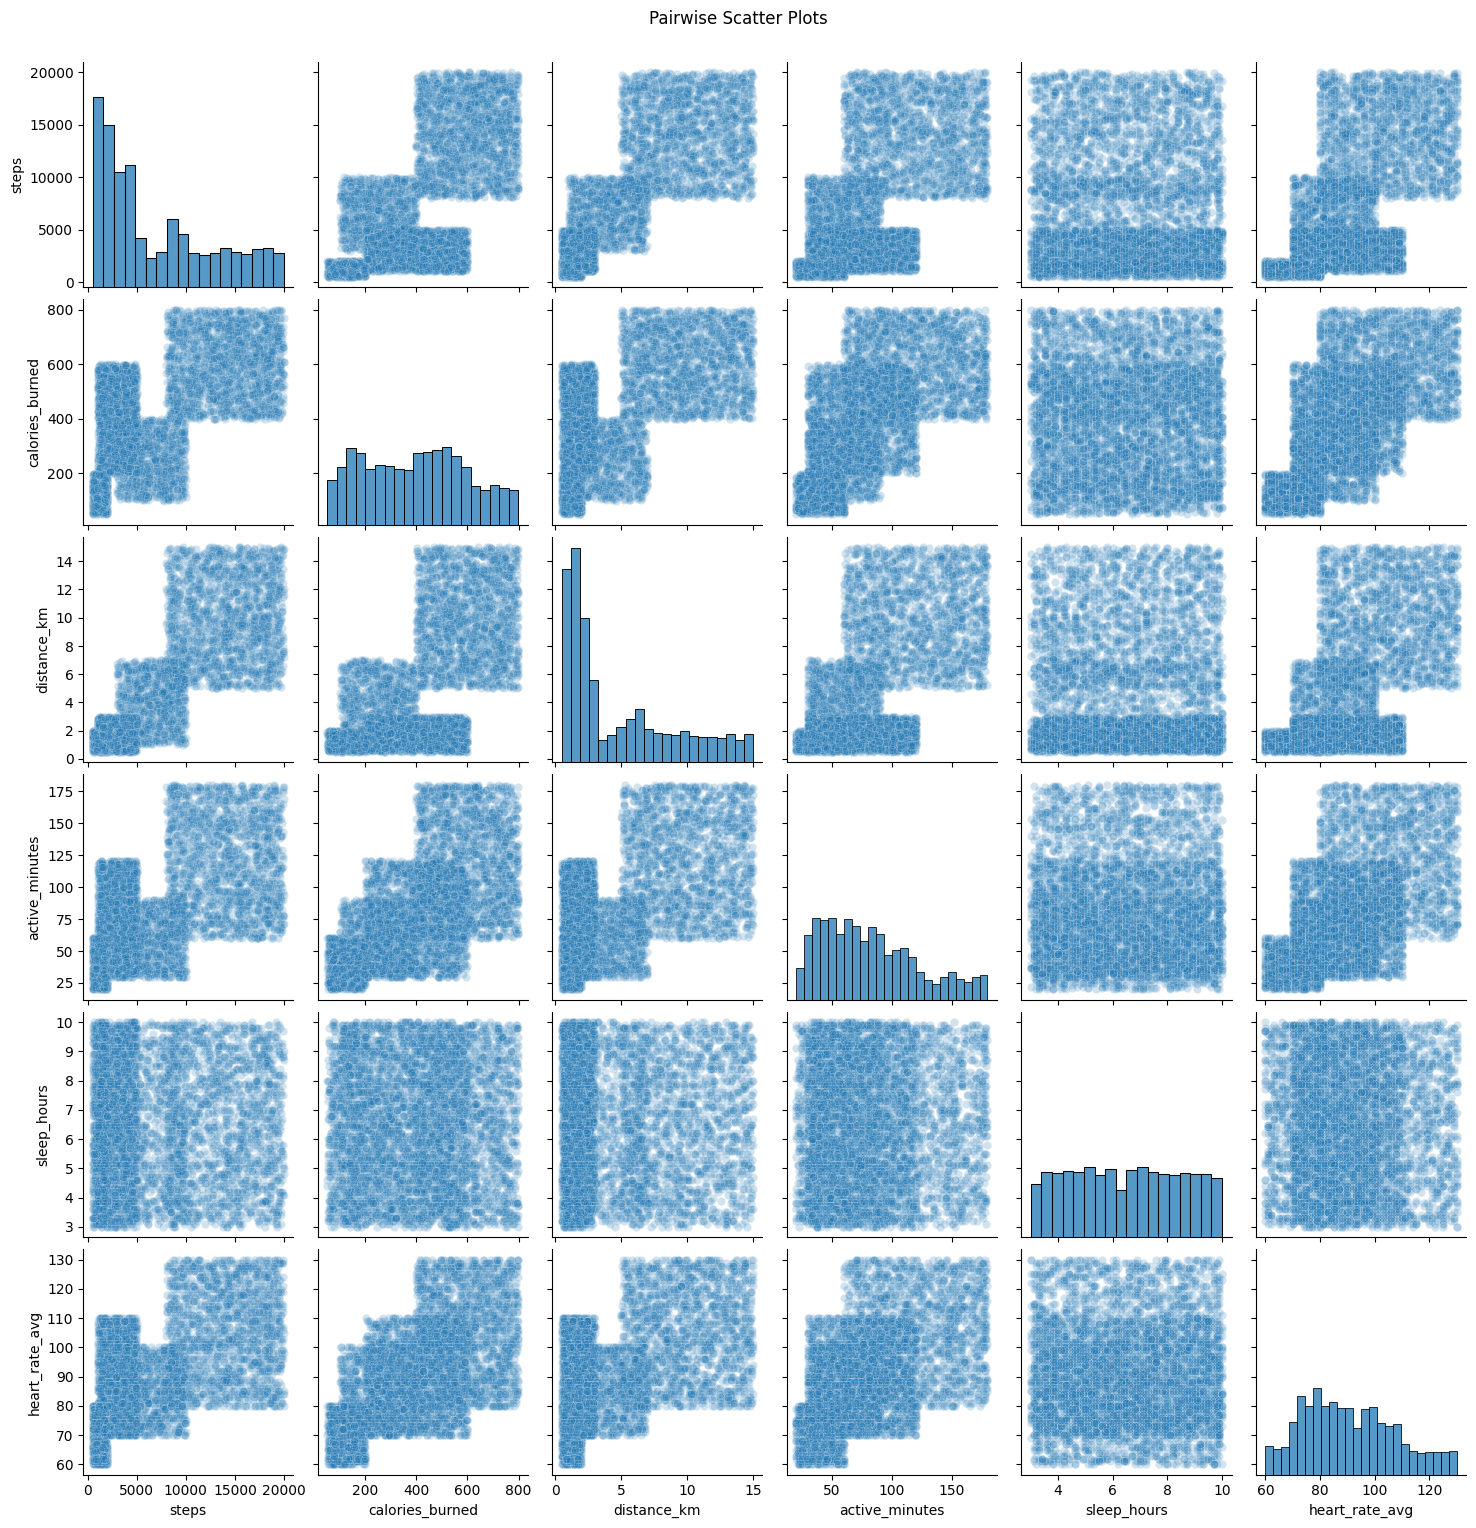

In [10]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns for pairwise analysis
numerical_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']

# Create scatter plots for each pair of numerical columns
sns.pairplot(data[numerical_cols], kind='scatter', plot_kws={'alpha':0.2})
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()


##Correlation Analysis

Pearson Correlation:
                     steps  calories_burned  distance_km  active_minutes  \
steps            1.000000         0.650878     0.826266        0.608737   
calories_burned  0.650878         1.000000     0.627583        0.620325   
distance_km      0.826266         0.627583     1.000000        0.602607   
active_minutes   0.608737         0.620325     0.602607        1.000000   
sleep_hours      0.000267         0.007983     0.009640        0.005675   
heart_rate_avg   0.581587         0.601147     0.549875        0.530092   

                 sleep_hours  heart_rate_avg  
steps               0.000267        0.581587  
calories_burned     0.007983        0.601147  
distance_km         0.009640        0.549875  
active_minutes      0.005675        0.530092  
sleep_hours         1.000000        0.001811  
heart_rate_avg      0.001811        1.000000  
Spearman Correlation:
                     steps  calories_burned  distance_km  active_minutes  \
steps            1.000000

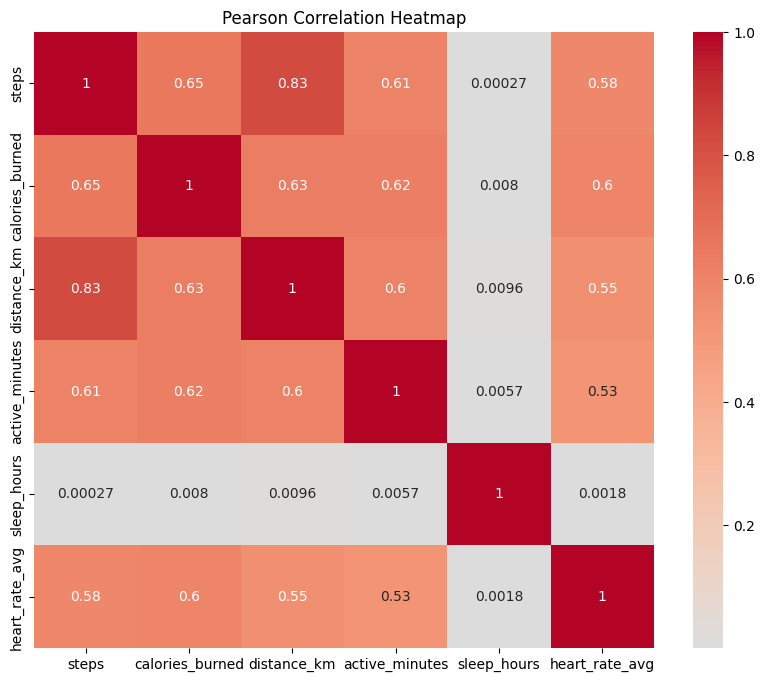

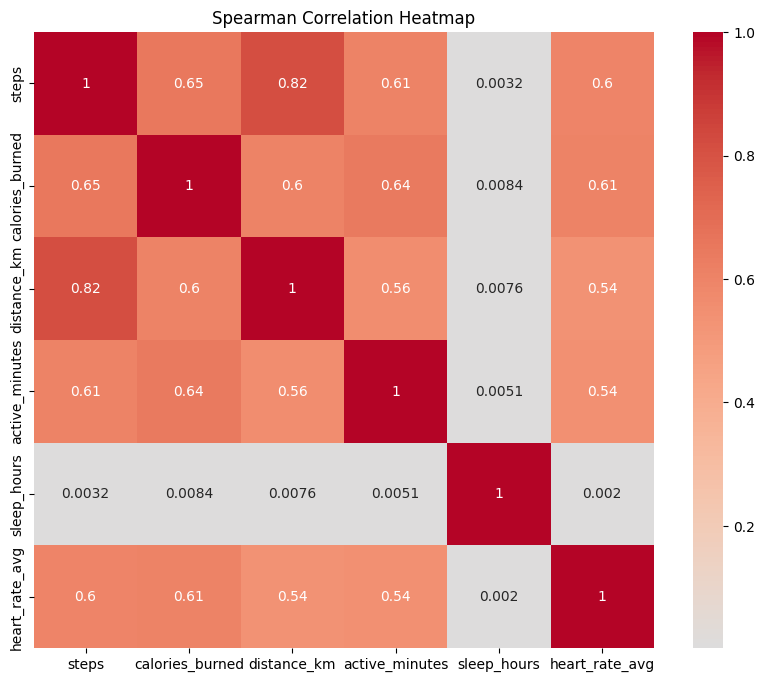

In [11]:
# Calculate Pearson correlation
pearson_corr = data[numerical_cols].corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

# Calculate Spearman correlation
spearman_corr = data[numerical_cols].corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

# Visualize Pearson correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Visualize Spearman correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()


##Handling Strong Correlations

In [12]:
# Set correlation threshold
correlation_threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = [(col1, col2, pearson_corr.loc[col1, col2]) for col1 in pearson_corr.columns for col2 in pearson_corr.columns
                   if col1 != col2 and abs(pearson_corr.loc[col1, col2]) > correlation_threshold]

# Display high correlation pairs
print("Highly correlated pairs (Pearson) above threshold of", correlation_threshold, ":\n")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2} with correlation of {corr_value:.2f}")

# Optionally, check variance of these pairs and select one to remove
for col1, col2, _ in high_corr_pairs:
    print(f"\nVariance for {col1}: {data[col1].var()}")
    print(f"Variance for {col2}: {data[col2].var()}")


Highly correlated pairs (Pearson) above threshold of 0.8 :

steps and distance_km with correlation of 0.83
distance_km and steps with correlation of 0.83

Variance for steps: 33066986.79164807
Variance for distance_km: 17.61430421834373

Variance for distance_km: 17.61430421834373
Variance for steps: 33066986.79164807


##Categorical vs Numerical Relationships

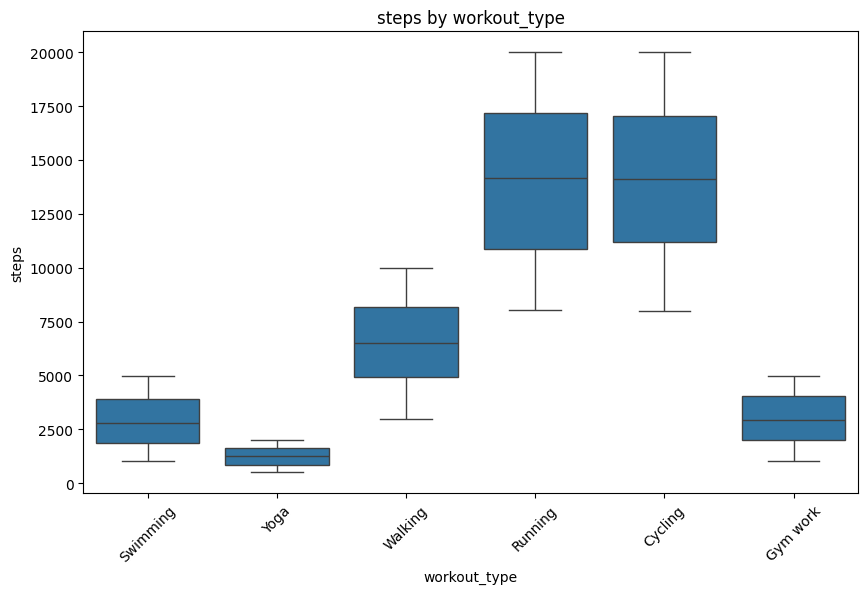

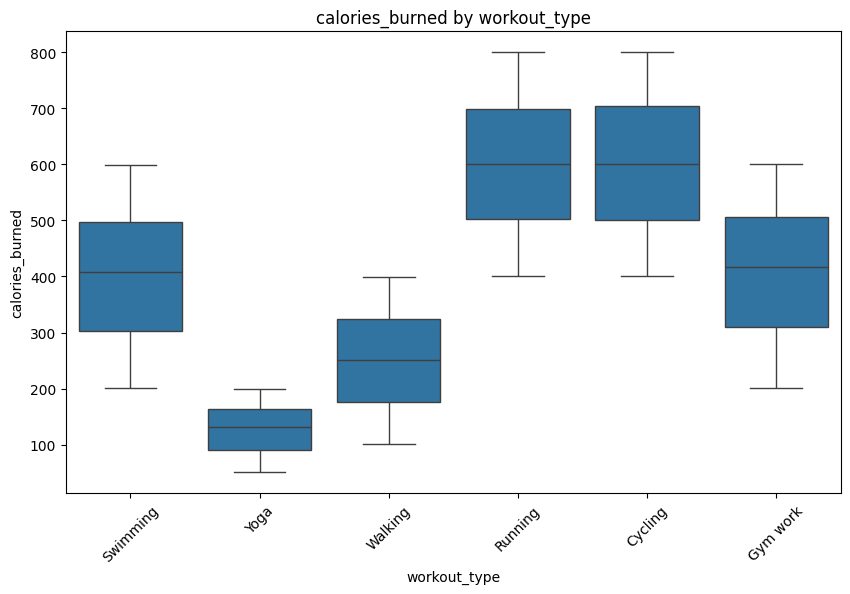

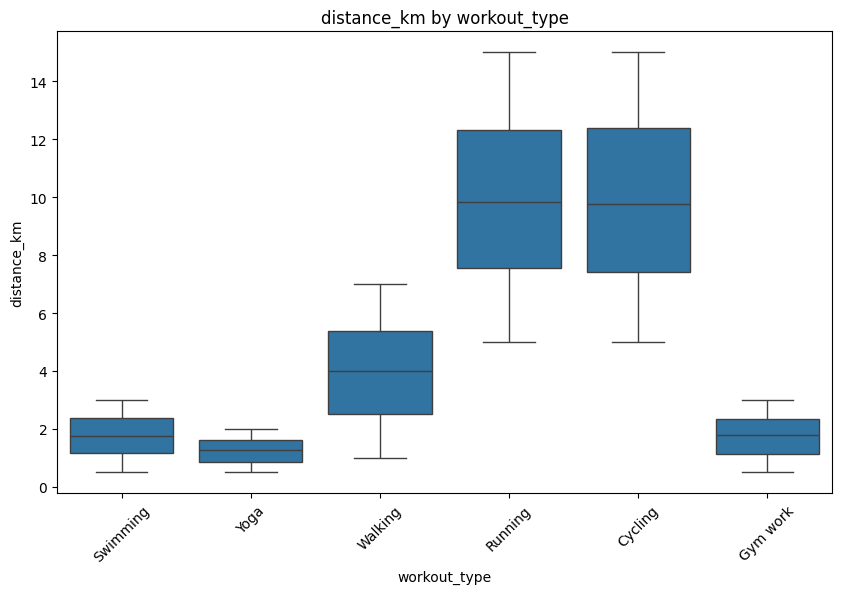

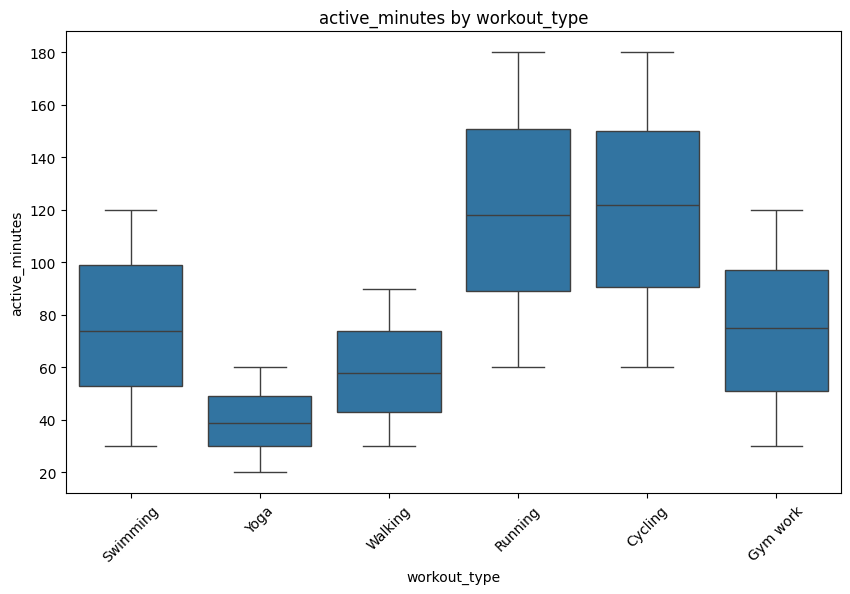

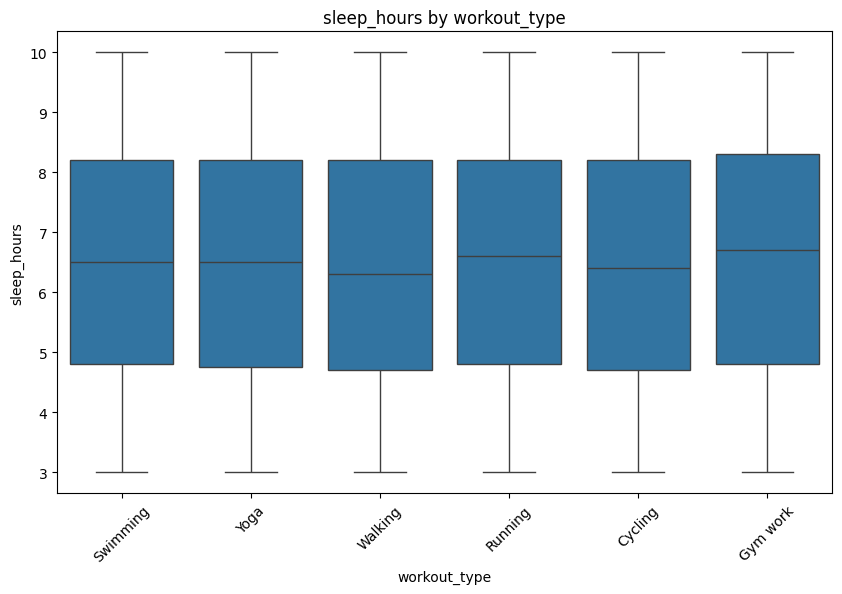

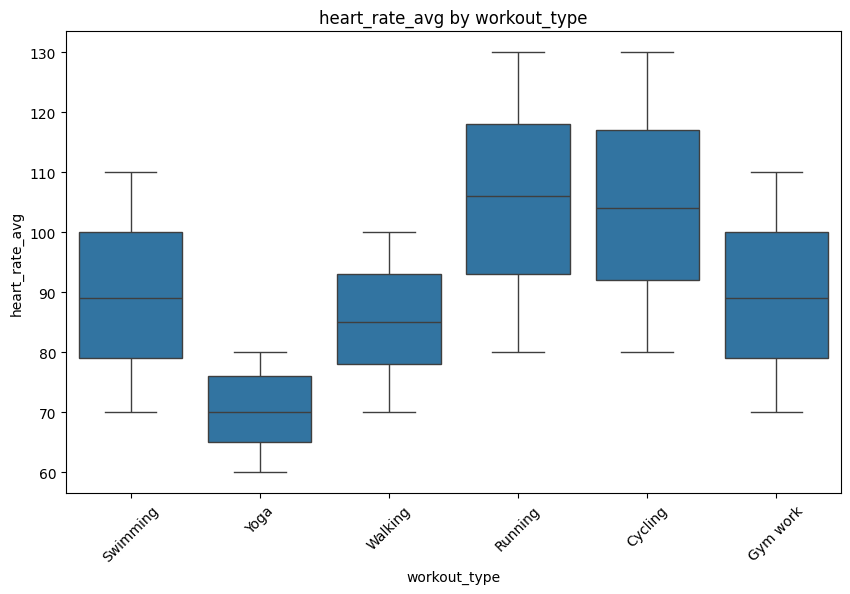

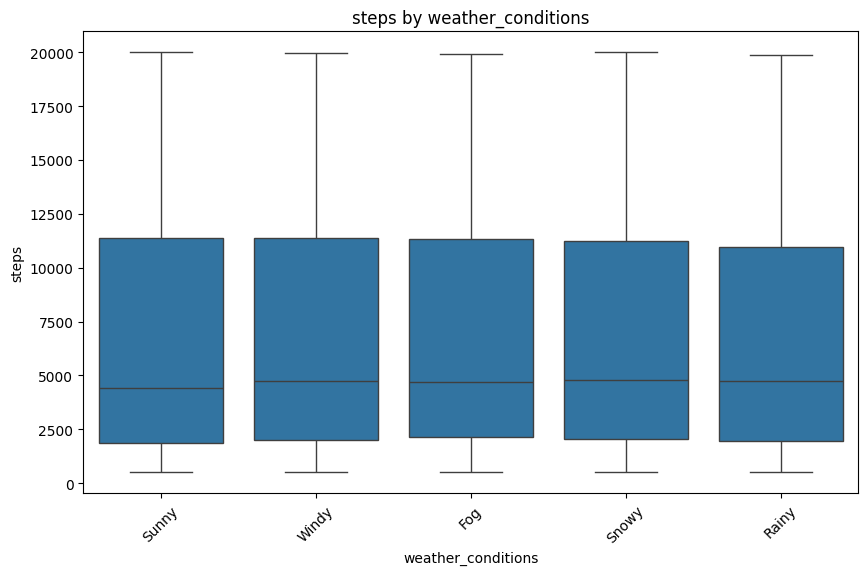

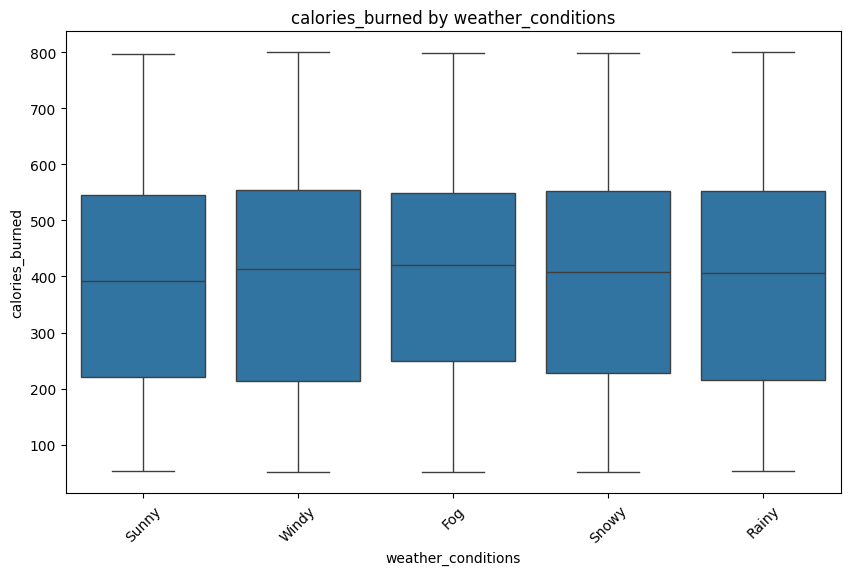

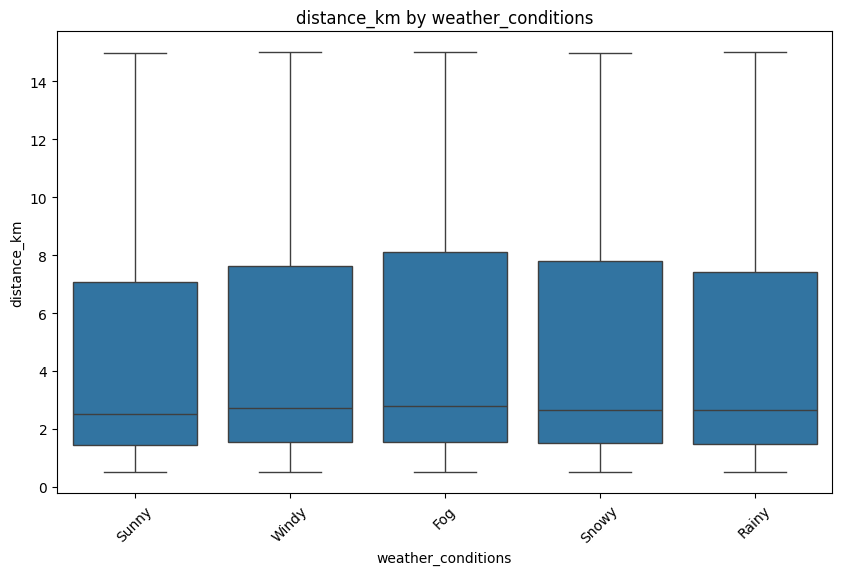

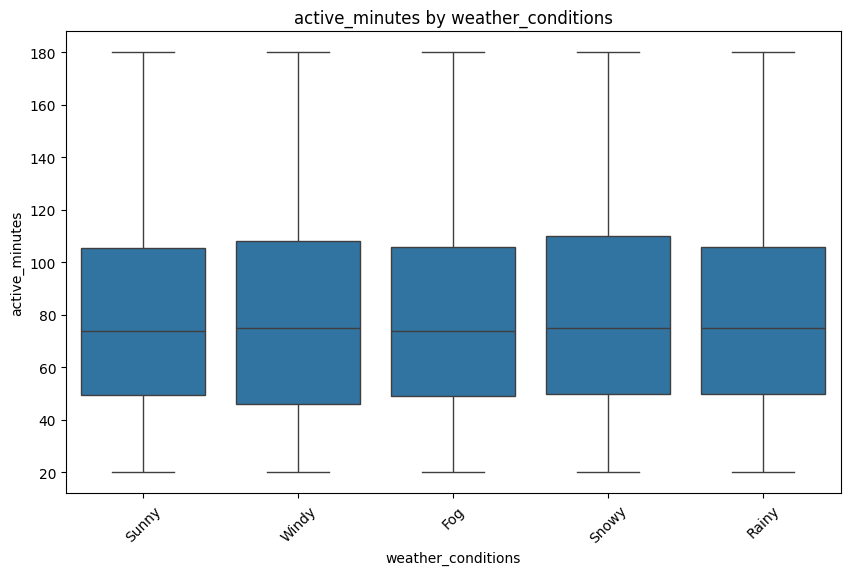

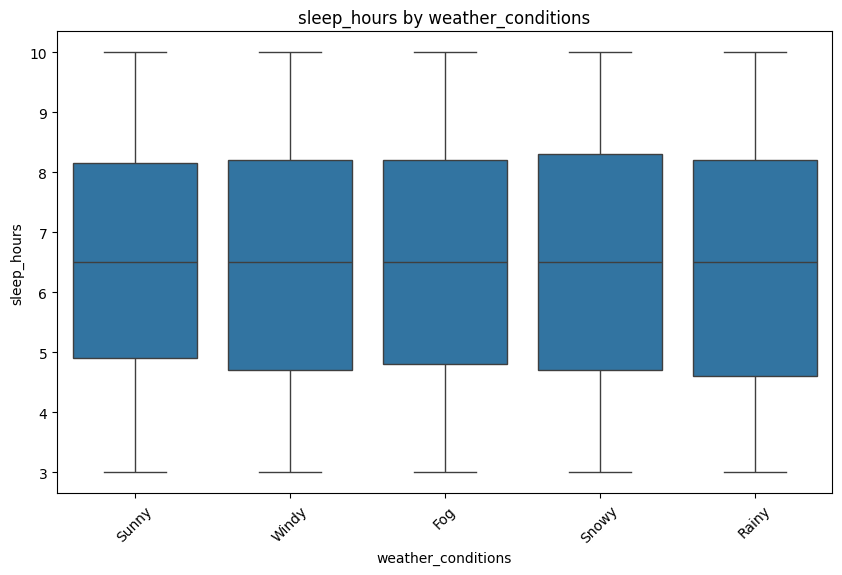

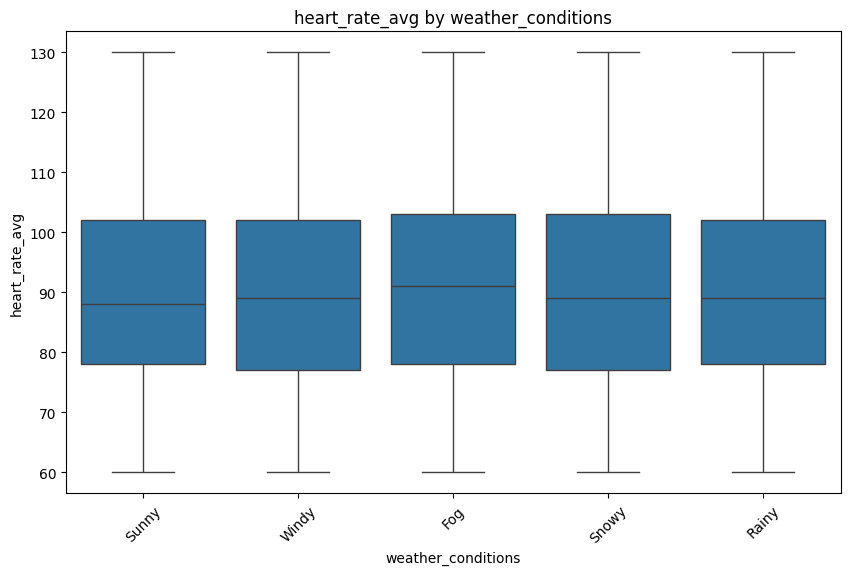

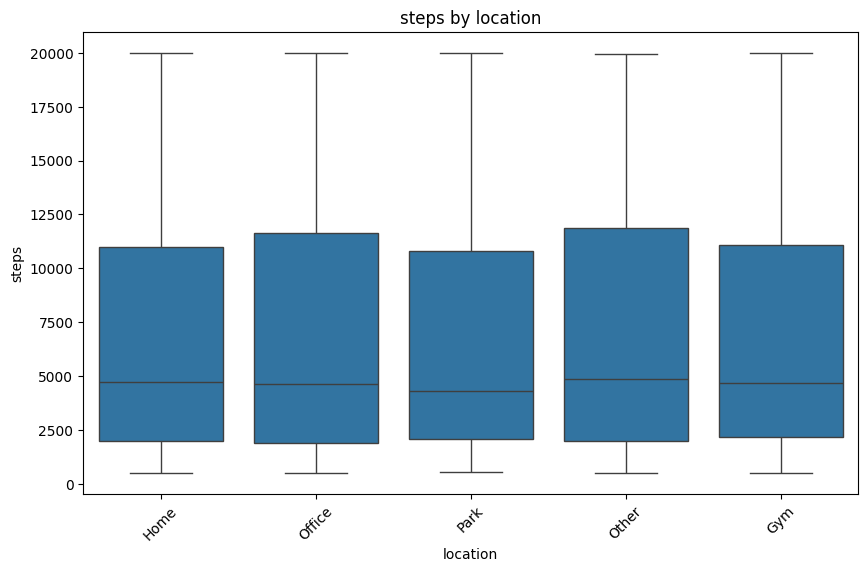

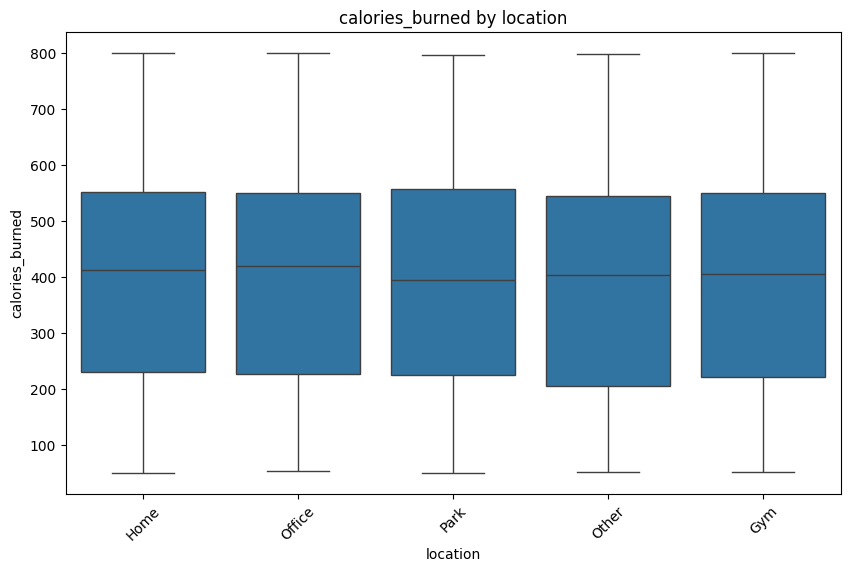

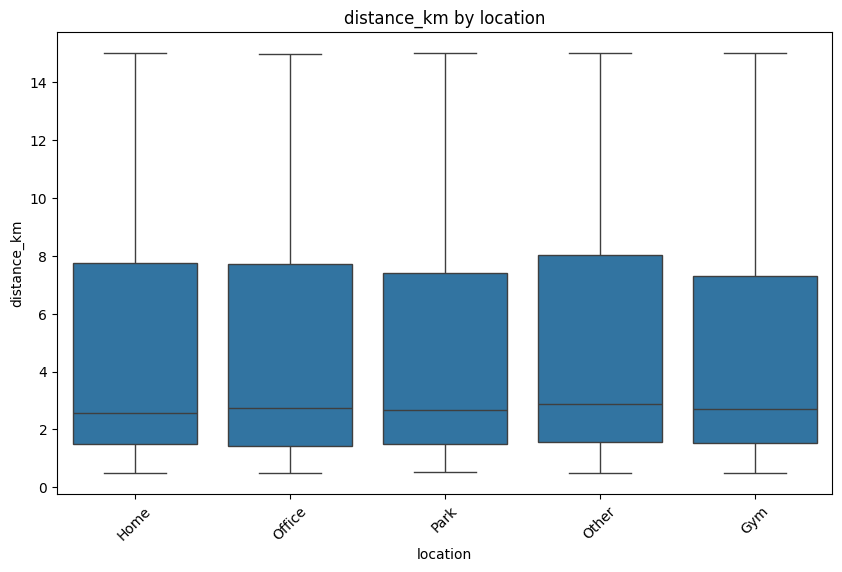

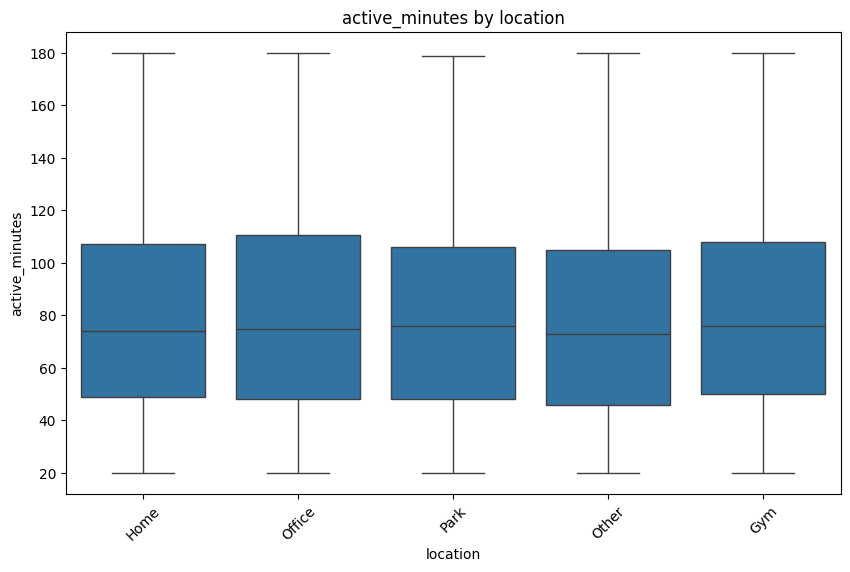

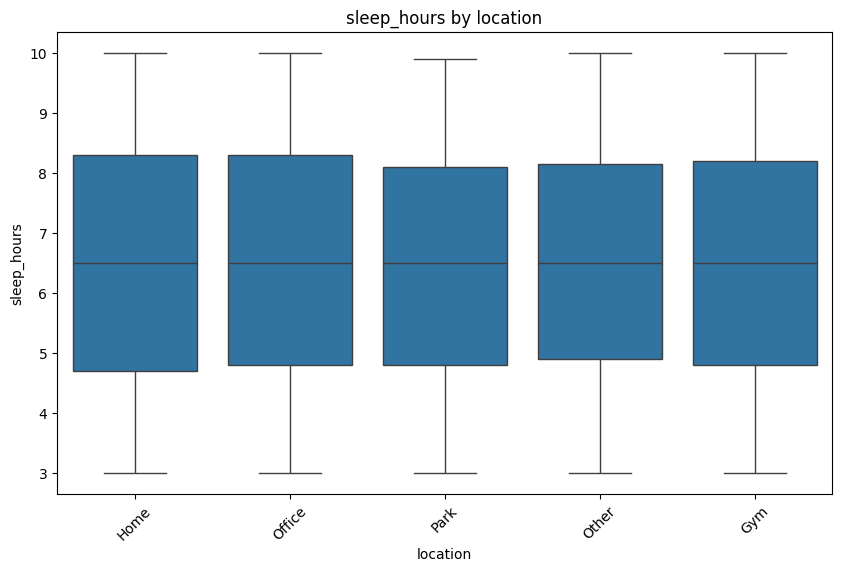

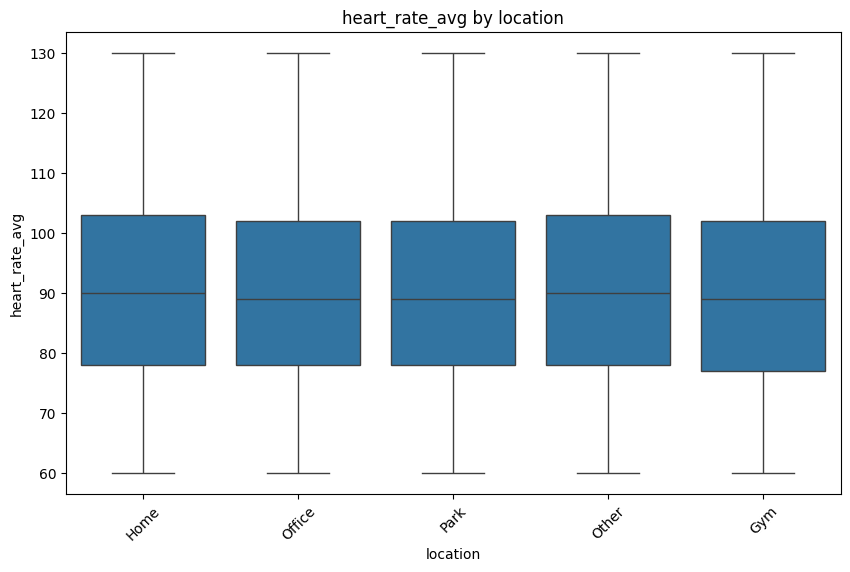

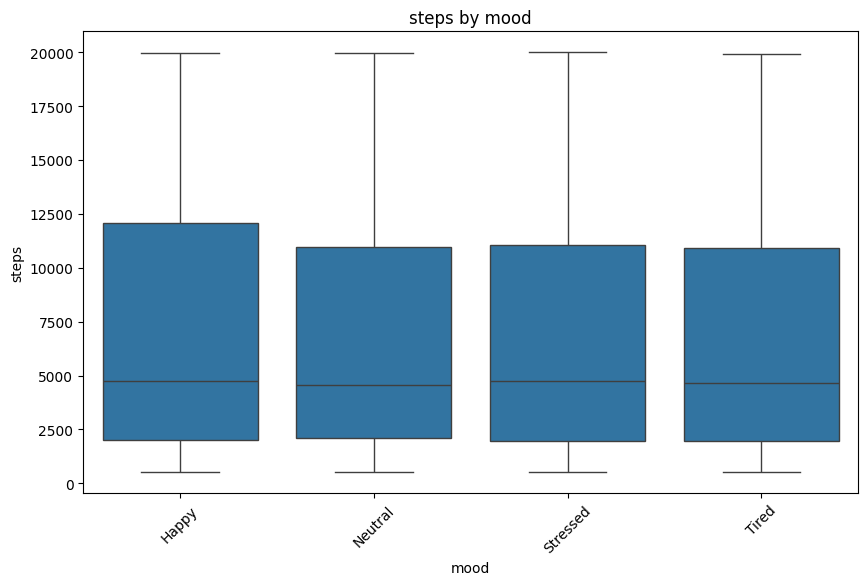

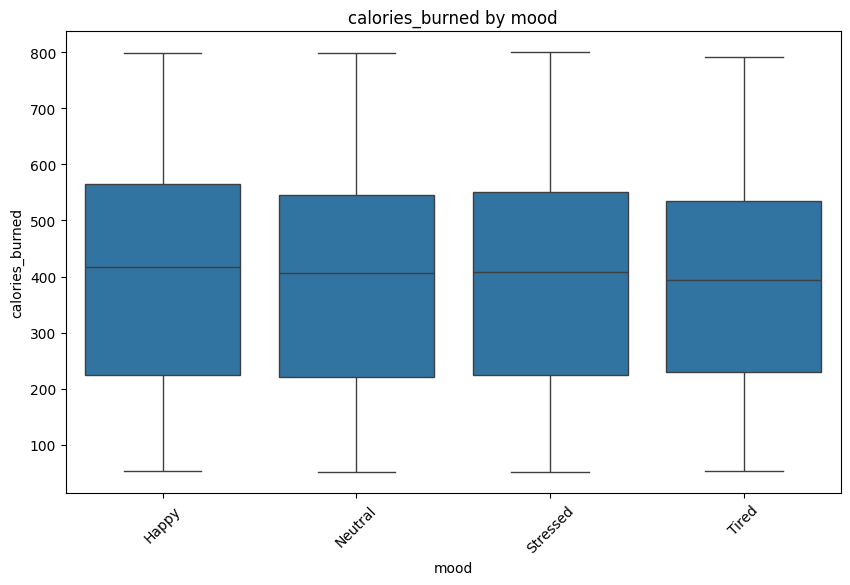

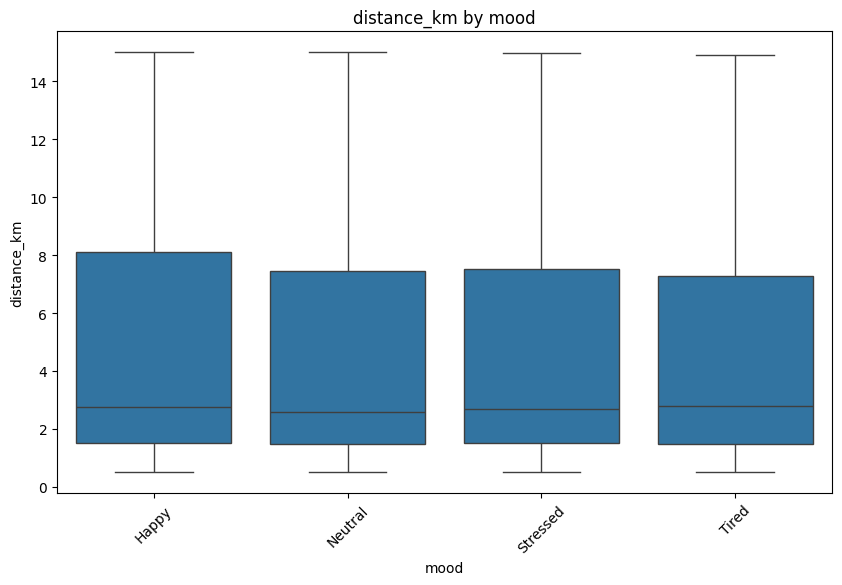

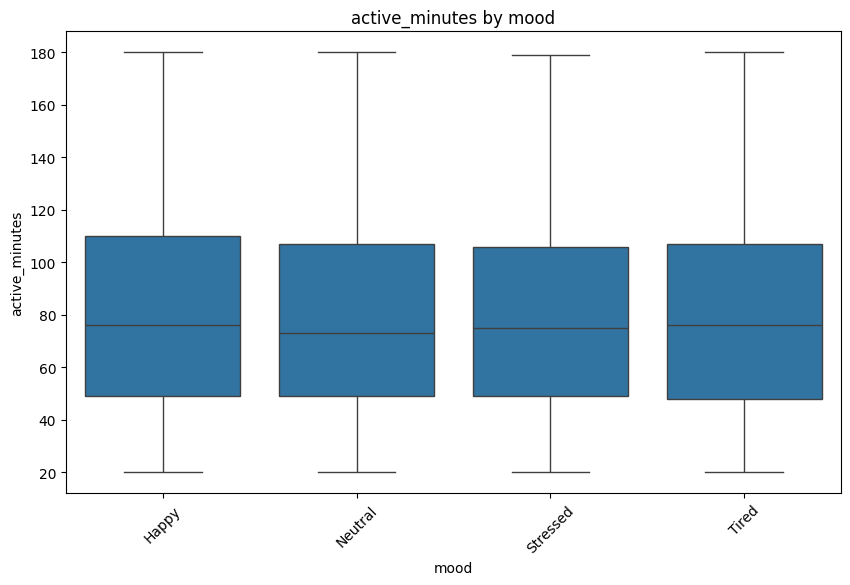

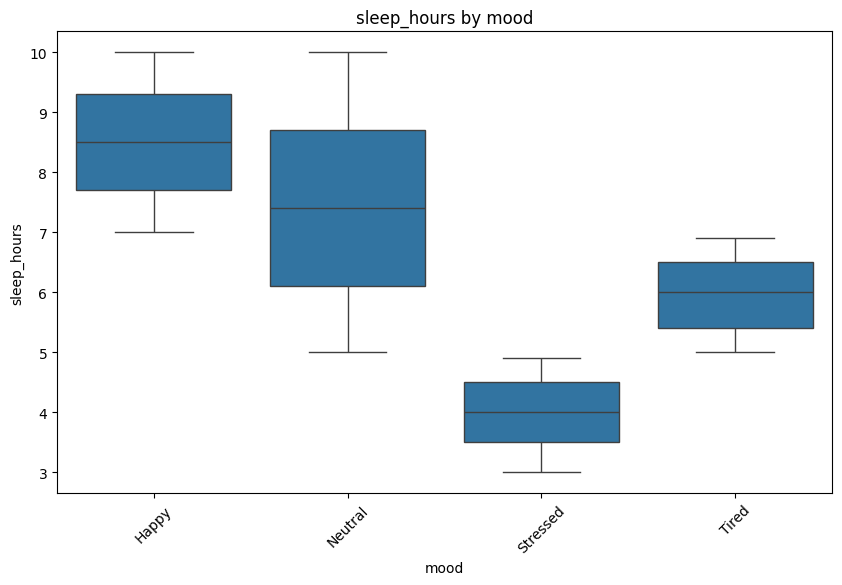

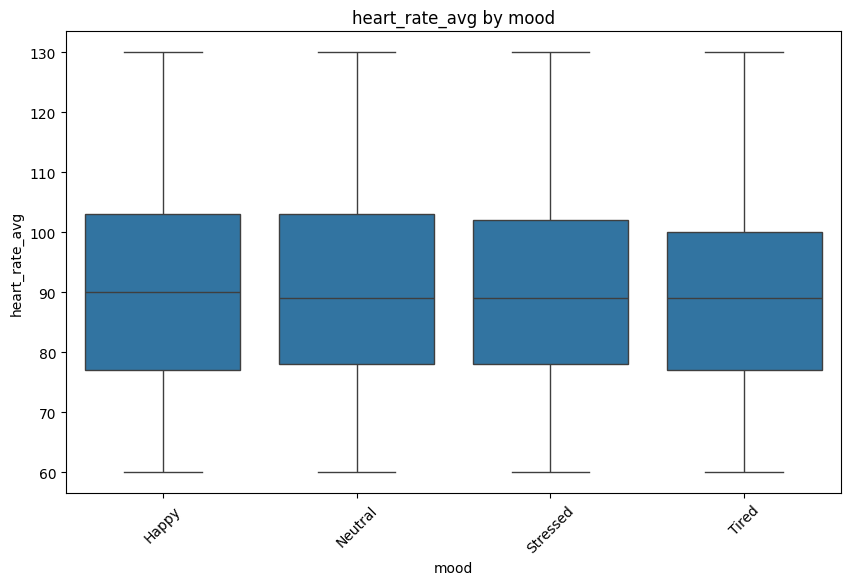

In [13]:
# Define categorical columns
categorical_cols = ['workout_type', 'weather_conditions', 'location', 'mood']

# Plot boxplots for numerical variables against categorical variables
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[cat_col], y=data[num_col])
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()


#Multivariate analysis

##Multivariate Relationships with Pairplot and Hue

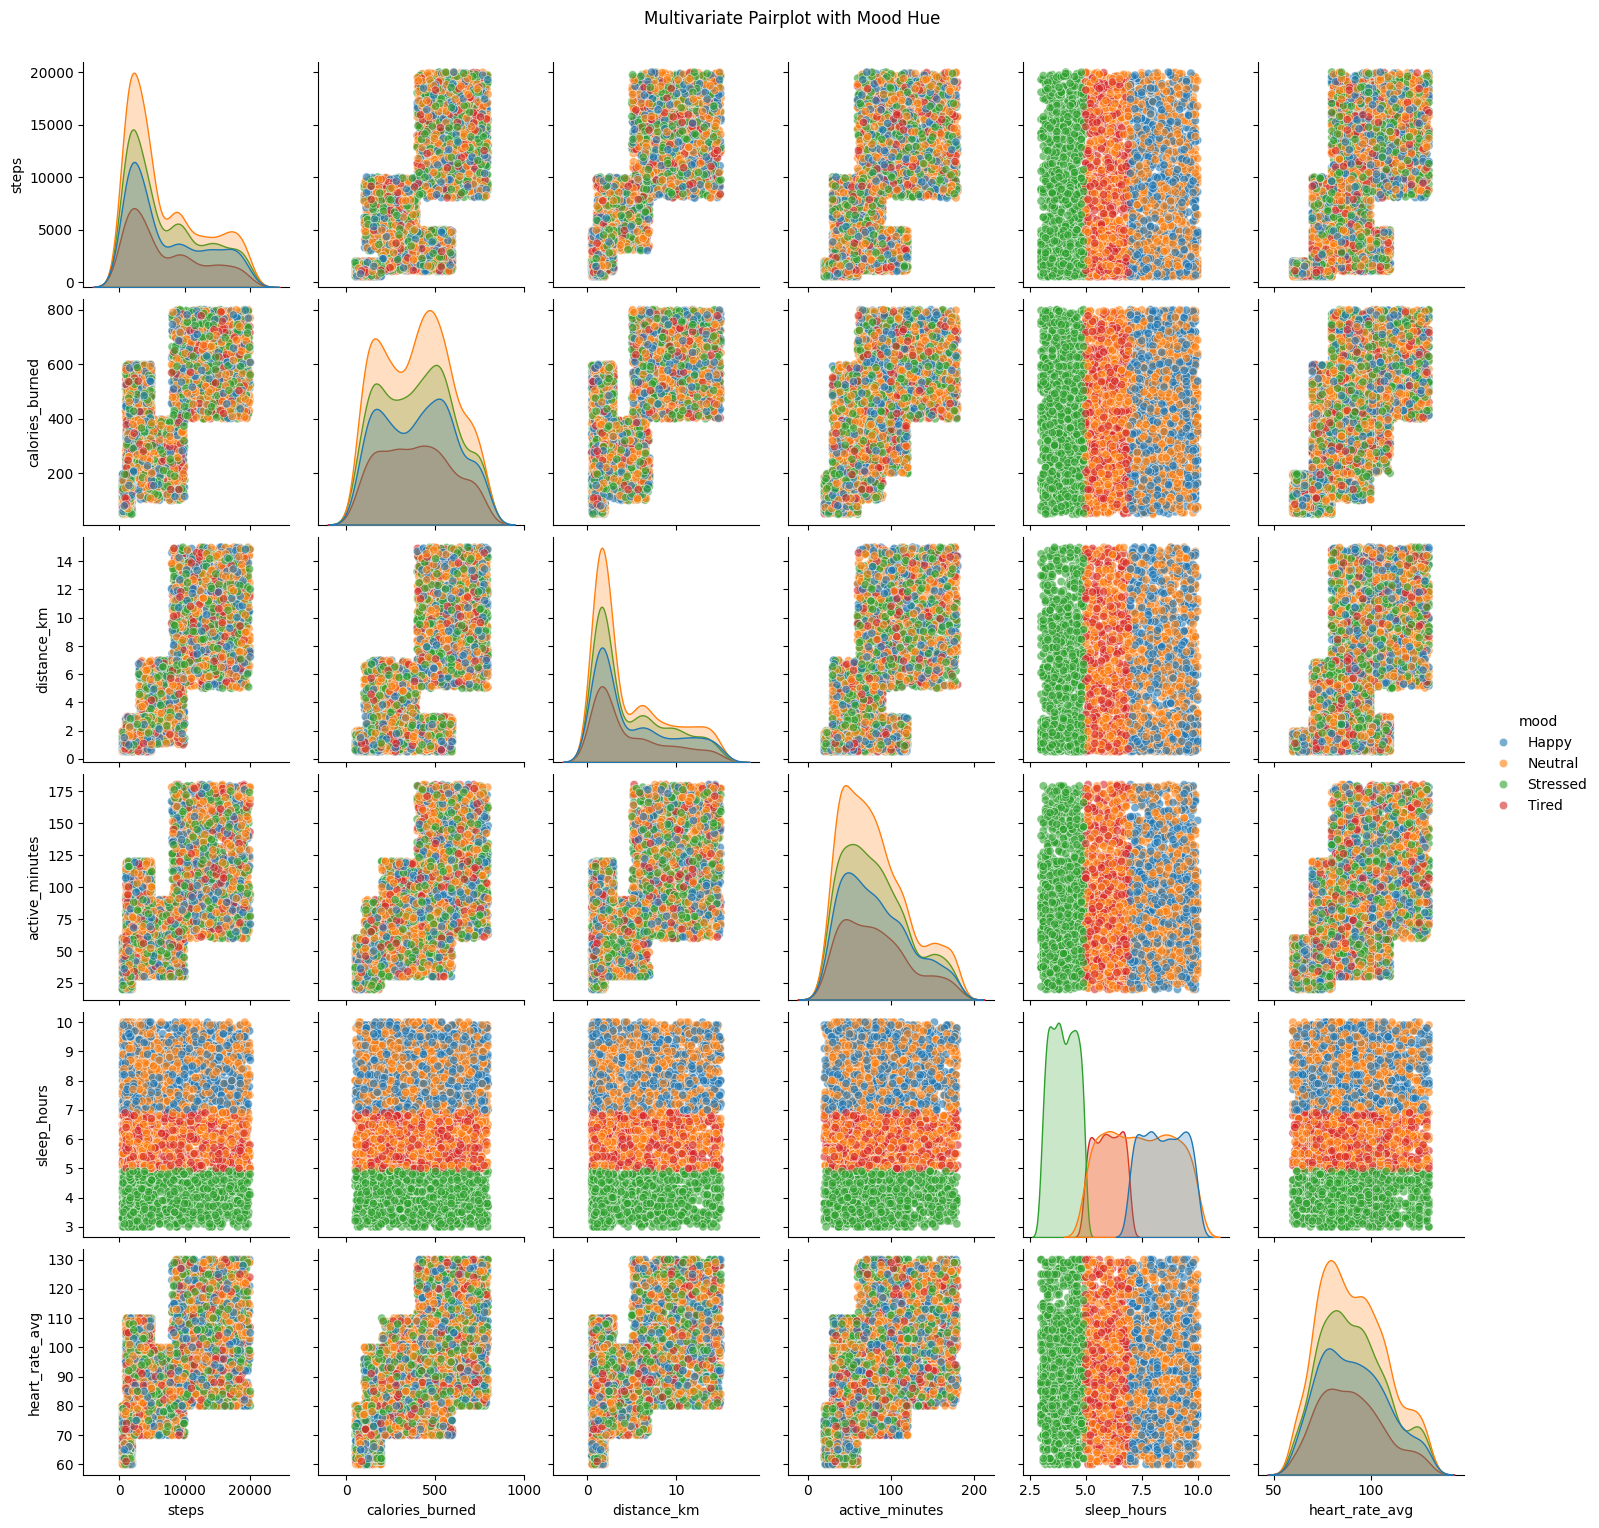

In [14]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with a categorical variable (e.g., mood) as hue to see differences across groups
sns.pairplot(data, vars=['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg'],
             hue='mood', plot_kws={'alpha':0.6})
plt.suptitle("Multivariate Pairplot with Mood Hue", y=1.02)
plt.show()


##Heatmap of Correlations for Selected Variables

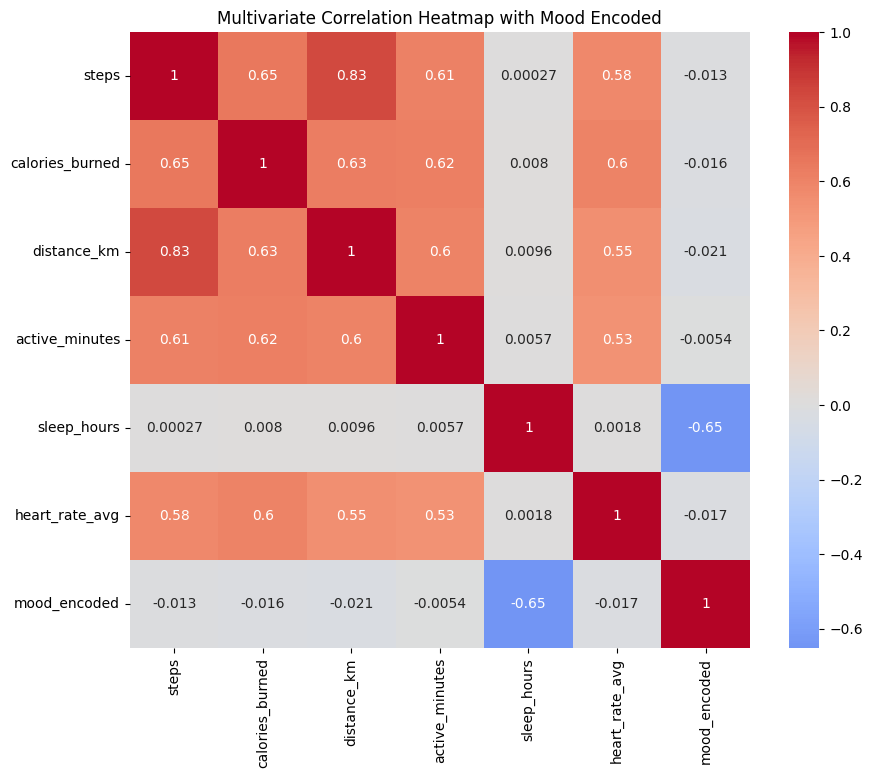

In [15]:
# Select a subset of columns for a focused correlation analysis
selected_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg', 'mood']

# Encode categorical variable 'mood' for correlation purposes
data['mood_encoded'] = data['mood'].astype('category').cat.codes

# Calculate and plot correlation, EXCLUDING the original 'mood' column
multivariate_corr = data[[c for c in selected_cols if c != 'mood'] + ['mood_encoded']].corr() # Exclude 'mood' and include 'mood_encoded'
plt.figure(figsize=(10, 8))
sns.heatmap(multivariate_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Multivariate Correlation Heatmap with Mood Encoded")
plt.show()

##Multivariate Analysis using ANOVA

In [16]:
from scipy.stats import f_oneway

# Define numerical columns and categorical variable
numerical_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']
categorical_var = 'mood'

# Run ANOVA for each numerical variable by 'mood' and print the results
print("ANOVA Results by Mood Category:\n")
for col in numerical_cols:
    groups = [data[col][data[categorical_var] == category] for category in data[categorical_var].unique()]
    f_val, p_val = f_oneway(*groups)
    print(f"{col} - F-value: {f_val:.2f}, p-value: {p_val:.4f}")


ANOVA Results by Mood Category:

steps - F-value: 0.76, p-value: 0.5169
calories_burned - F-value: 0.74, p-value: 0.5305
distance_km - F-value: 1.44, p-value: 0.2298
active_minutes - F-value: 0.44, p-value: 0.7224
sleep_hours - F-value: 4529.35, p-value: 0.0000
heart_rate_avg - F-value: 0.78, p-value: 0.5033


##Multivariate Linear Regression

In [17]:
import statsmodels.api as sm

# Convert categorical mood to numeric encoding for regression analysis
data['mood_encoded'] = data['mood'].astype('category').cat.codes

# Define the predictor variables (numerical features)
X = data[['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']]
X = sm.add_constant(X)  # Adds a constant term to the model

# Define the target variable
y = data['mood_encoded']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           mood_encoded   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     617.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:23:47   Log-Likelihood:                -5603.1
No. Observations:                5000   AIC:                         1.122e+04
Df Residuals:                    4993   BIC:                         1.127e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4803      0.072     

##Multivariate Visualization with Heatmap Clustering

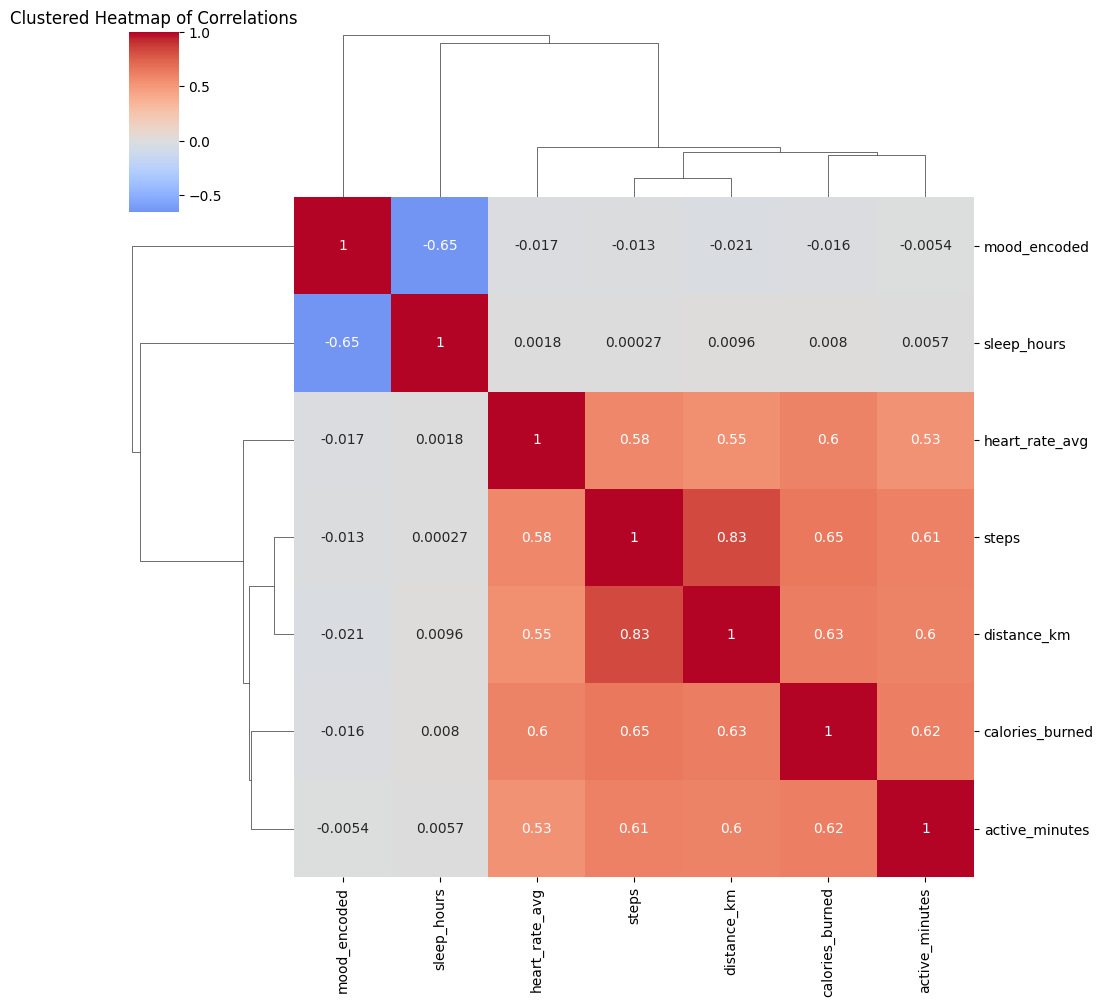

In [18]:
# Clustermap for correlation-based clustering
sns.clustermap(multivariate_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Clustered Heatmap of Correlations")
plt.show()


##Exploratory Analysis


##Normalizing and Scaling the Data

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define numerical columns to normalize and scale
numerical_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']

# Scaling data to zero mean and unit variance (Standardization)
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Normalizing data to a 0-1 range (Min-Max Scaling)
normalizer = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_cols] = normalizer.fit_transform(data[numerical_cols])

# Display standardized and normalized data samples
print("Standardized Data Sample:\n", data_standardized.head())
print("\nNormalized Data Sample:\n", data_normalized.head())


Standardized Data Sample:
    user_id       date     steps  calories_burned  distance_km  active_minutes  \
0       27 2023-05-24 -0.984163         0.738428    -0.743795       -0.040248   
1       64 2023-05-27 -1.070426        -1.138743    -0.874856       -0.986100   
2       32 2023-09-12 -0.622412        -0.363608    -0.820048       -1.110554   
3       34 2023-05-13 -0.960858        -1.351328    -0.767624       -1.060772   
4       53 2023-08-05  0.681108         0.610576     1.951295        1.727000   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0     0.300430       -0.467333     Swimming              Sunny     Home   
1     0.897687       -1.593466         Yoga              Windy   Office   
2     1.146544       -1.237845      Walking              Sunny     Park   
3     0.399973       -0.822954         Yoga                Fog     Park   
4    -1.690426        1.844202      Running              Windy    Other   

       mood  year  month  day  mood

##Sub-setting the Data

In [20]:
# Example: Subset data where 'mood' is 'Happy' and 'workout_type' is 'Running'
subset_data = data[(data['mood'] == 'Happy') & (data['workout_type'] == 'Running')]

# Display the subset sample
print("Subset Data Sample:\n", subset_data.head())


Subset Data Sample:
     user_id       date  steps  calories_burned  distance_km  active_minutes  \
23       83 2023-05-08  19030            616.7        13.74             168   
27       47 2023-01-14   9453            578.4         8.33             110   
51       21 2023-06-08  12492            490.7        10.53             173   
52       30 2023-02-12  14830            709.3         8.12             168   
68        9 2023-02-23  10874            611.6        10.14             160   

    sleep_hours  heart_rate_avg workout_type weather_conditions location  \
23          7.1             120      Running              Rainy      Gym   
27          9.4             112      Running              Snowy      Gym   
51          8.3             128      Running              Sunny    Other   
52          9.8              87      Running              Rainy      Gym   
68          9.7              83      Running              Sunny      Gym   

     mood  year  month  day  mood_encoded  
23 

##Association Rules using the Apriori Algorithm

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical data to one-hot encoding for association rules
data_encoded = pd.get_dummies(data[['workout_type', 'weather_conditions', 'location', 'mood']])

# Apply the Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display association rules
print("Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Association Rules:
                   antecedents                 consequents  support  \
0    (weather_conditions_Fog)      (workout_type_Cycling)   0.0360   
1      (workout_type_Cycling)    (weather_conditions_Fog)   0.0360   
2      (workout_type_Cycling)  (weather_conditions_Rainy)   0.0346   
3  (weather_conditions_Rainy)      (workout_type_Cycling)   0.0346   
4  (weather_conditions_Snowy)      (workout_type_Cycling)   0.0382   

   confidence      lift  
0    0.180361  1.035366  
1    0.206659  1.035366  
2    0.198622  1.040997  
3    0.181342  1.040997  
4    0.181043  1.039280  


##K-Means Clustering


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


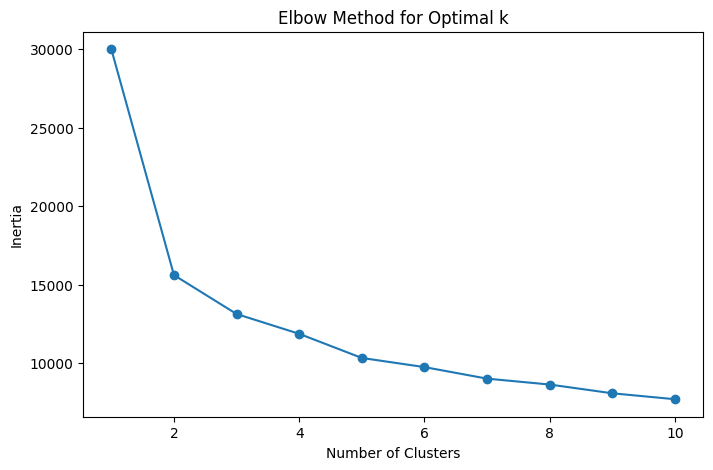

Clustered Data Sample:
       steps  calories_burned  distance_km  active_minutes  sleep_hours  \
0 -0.984163         0.738428    -0.743795       -0.040248     0.300430   
1 -1.070426        -1.138743    -0.874856       -0.986100     0.897687   
2 -0.622412        -0.363608    -0.820048       -1.110554     1.146544   
3 -0.960858        -1.351328    -0.767624       -1.060772     0.399973   
4  0.681108         0.610576     1.951295        1.727000    -1.690426   

   heart_rate_avg  cluster  
0       -0.467333        2  
1       -1.593466        2  
2       -1.237845        2  
3       -0.822954        2  
4        1.844202        1  


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using standardized data for clustering
X = data_standardized[numerical_cols]

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform K-Means clustering with optimal k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
data_standardized['cluster'] = kmeans.fit_predict(X)

# Display clustering results
print("Clustered Data Sample:\n", data_standardized[['steps', 'calories_burned', 'distance_km', 'active_minutes',
                                                    'sleep_hours', 'heart_rate_avg', 'cluster']].head())
